# Regresion Lineal Simple

### Analisis de Datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from colorama import Fore, Style, Back # Es solo para separar mejor el codigo
import seaborn as sns


In [3]:

#* Cargamos los datos de la dataset
data = pd.read_csv("DATA\Advertising.csv")
## Observar los datos
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data = data.iloc[:,1:] ### Sirve para eliminar la columna unnamed por que nos servira de nada


In [5]:
#
#* Informacion del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
#
#* Operacion con Datos(Conocer mejor los datos)
data.describe()  ## Operaciones como el conteo, el promedio, min, max, etc


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
#
#* Conocer las columnas
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

### Visualizacion de Datos

Ventas obtenidas en  base a cada tipo de publicidad
#### Caracteristicas
- TV: Se puede ver que este si gastamos mas en publicidad, tendremos mas ganacias
- Radio: Aqui se invertio poco por lo que hubo poca ganancia, ademas los datos son mas dispersos
- NewSpaper: No importa cuanto se gasta siempre tendra una tendencia alta en ganacias, y si aumenta la publicidad no significa que aumente las ventas, y si dismimuye la publicidad no significa que disminuyan las ventas 

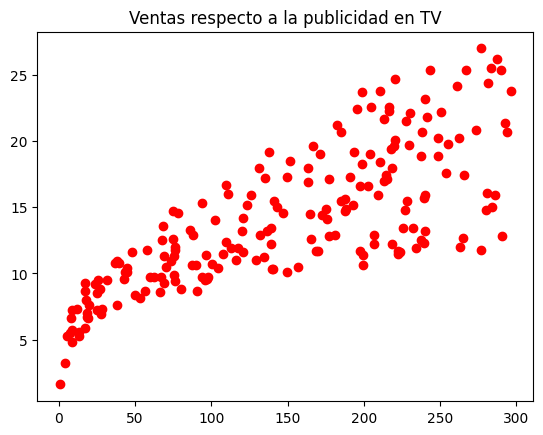

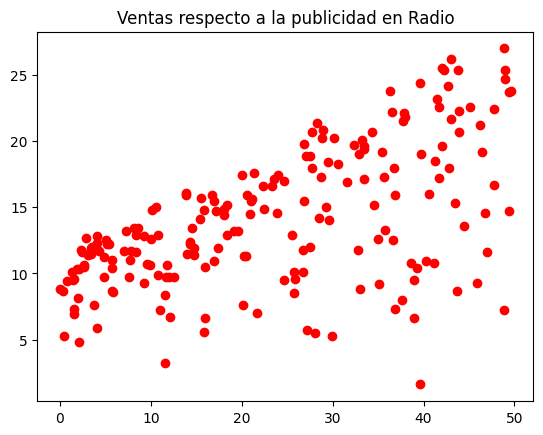

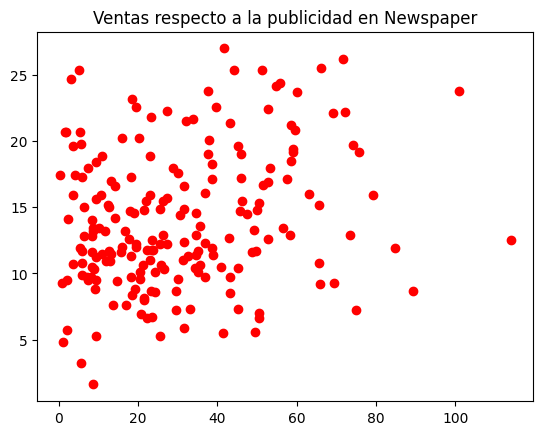

In [8]:

cols = ['TV', 'Radio', 'Newspaper']
for col in cols:
  plt.plot(data[col],data["Sales"], "ro")
  plt.title(f"Ventas respecto a la publicidad en {col}")
  plt.show()

### Entrenamiento

In [9]:
from sklearn.linear_model import LinearRegression # importamos el modulo
from sklearn.model_selection import train_test_split # Nos permite devidir los datos en testing  y training
from sklearn.metrics import mean_squared_error, r2_score # Calificar nuestro modelo

In [10]:
## Identificar las variables independientes y dependientes
X = data["TV"].values.reshape(-1,1) # Solo los valores de esa columna, reshape sirve para convertirlo en un array de 2 dimensiones 
y = data["Sales"].values # Solo los valores de esa columna, no es necesario el reshape por que ya es un array de 1 dimension

In [11]:
# Dividir los datos en entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% de los datos para testing(text_size=0.2) y el random_state es para que siempre se divida igual, el valor 42 es arbitrario(pero es el mas comun)
print(Back.RED + Fore.WHITE + "X_train shape: ", Style.RESET_ALL)
print(X_train.shape) # 80% de los datos para entrenamiento
print(Back.RED + Fore.WHITE + "X_test shape: ", Style.RESET_ALL)
print(X_test.shape) # 20% de los datos para testing

X_train shape:  
(160, 1)
X_test shape:  
(40, 1)


In [12]:
#Entrenamiento
lin_geg = LinearRegression() # Creamos el modelo
lin_geg.fit(X_train, y_train) # Entrenamos el modelo

LinearRegression()

In [13]:
#Prediccion
y_pred = lin_geg.predict(X_test)
print(Back.RED + Fore.WHITE + "Prediccion: ", Style.RESET_ALL)
print(y_pred) # Nos muestra las predicciones

Prediccion:  
[14.71794394 16.2115484  20.74819743  7.66403631 17.37013877 10.61402143
 17.2072847   9.44612512 17.46785121 15.2669948   8.58532504  9.73460946
 18.03086098  7.37089899 13.61053628 15.03899911  7.45930549 16.31391381
 10.62332738 18.16579721 17.79821232 10.27435438  8.88776831 18.79394862
 10.33019006  9.60897918 17.05373658 13.60123034 11.17703121  7.51048819
 16.41627922 10.339496   16.37440246  7.90599093 20.18053468 18.203021
  9.36702457 19.85482655 12.57292322  8.39920611]


### Evaluacion del Modelo

In [14]:
print(Back.RED  +f"Predicciones: {y_pred[:4]}; Reales: {y_test[:4]}" + Style.RESET_ALL) # Una comparacion de las predicciones con los valores reales

Predicciones: [14.71794394 16.2115484  20.74819743  7.66403631]; Reales: [16.9 22.4 21.4  7.3]


In [15]:
### Usando Tecnicas
#* RMSE
print(Back.RED + Fore.WHITE + "RMSE: ", Style.RESET_ALL)
rmse = mean_squared_error(y_test, y_pred, squared=False) # Calculamos el error cuadratico medio de la prediccion y_test con y_pred y squared=False para que no nos de el cuadrado
print(rmse)
#* R2
print(Back.RED + Fore.WHITE + "R2: ", Style.RESET_ALL)
r2 = r2_score(y_test, y_pred) # Calculamos el r2 de la prediccion y_test con y_pred
print(r2)

RMSE:  
3.194472431998898
R2:  
0.6766954295627076


### Visualizacion de la Prediccion

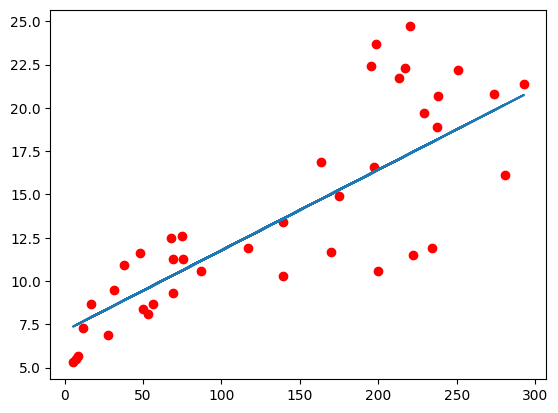

In [ ]:
plt.plot(X_test,y_test, "ro") # El ro es para que los puntos sean rojos
plt.plot(X_test, y_pred)
plt.show()

## Forma Automatizada
Aqui veremos una forma mas rapida para entrenar cualquier columna, utilizando una funcion.

In [17]:
def modelo_simple(independiente):
  X = data[independiente].values.reshape(-1,1)
  y = data["Sales"].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  lin_geg = LinearRegression() 
  lin_geg.fit(X_train, y_train)
  y_pred = lin_geg.predict(X_test)
  print(Back.RED + Fore.WHITE + "RMSE: ", Style.RESET_ALL)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  print(rmse)
  print(Back.RED + Fore.WHITE + "R2: ", Style.RESET_ALL)
  r2 = r2_score(y_test, y_pred)
  print(r2)
  plt.plot(X_test,y_test, "ro") # El ro es para que los puntos sean rojos
  plt.plot(X_test, y_pred)
  plt.show()

RMSE:  
4.8216974799471926
R2:  
0.2634309396999791


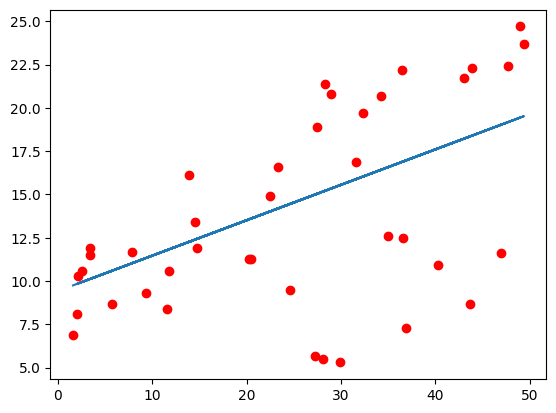

In [18]:
### Ejecutamos directamente la funcion
modelo_simple("Radio") ##Le pasamos la columna que queremos predecir(Televisión, Radio, Newspaper)

# Regresion Lineal Multiple
Tenemos mas variables independientes para predecir el valor independiente

RMSE:  
1.7714254173033515
R2:  
0.9005833101920356


<Axes: >

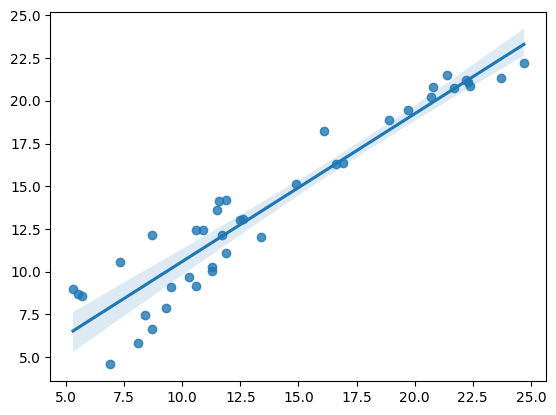

In [20]:
X = data.drop(["Newspaper", "Sales"], axis=1).values # Eliminamos la columna Radio y Sales(y nos quedamos solo con Television y Newspaper) y lo convertimos en un array, axis = 1 es para que elimine columnas y no filas
y = data["Sales"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_geg = LinearRegression() 
lin_geg.fit(X_train, y_train)
y_pred = lin_geg.predict(X_test)
print(Back.RED + Fore.WHITE + "RMSE: ", Style.RESET_ALL)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)
print(Back.RED + Fore.WHITE + "R2: ", Style.RESET_ALL)
r2 = r2_score(y_test, y_pred)
print(r2)
#* Aqui hay un cambio(Con seaborn)
sns.regplot(x= y_test, y= y_pred) # Usamos seaborn para hacer una regresion lineal de los datos reales y los predichos